In [1]:
import pandas as pd
import numpy as np

In [2]:
## Load the dataset
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist

X, y = mnist['data'], mnist['target']
X.shape, y.shape

((70000, 784), (70000,))

In [3]:
type(X)

pandas.core.frame.DataFrame

In [4]:
X.head()
# here it contains 784 columns, this is because each image is 28x28 pixels and each feature simply represents one pixel's intensity, from 0(white) to 255(black).


pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0        0  ...         0         0         0         0         0         0   
1        0  ...         0         0         0         0         0         0   
2        0  ...         0         0         0         0         0         0   
3        0  ...         0         0         0         0         0         0   
4        0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 784 columns]

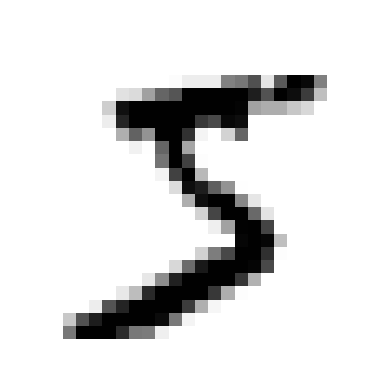

In [5]:
## now let's peak one of the digit from the dataset.
## All we need do is grab an instance's feature vector, reshape it to a 28x28 array, and display it using matplotlib's imshow() function
import matplotlib.pyplot as plt
import matplotlib

some_digit = X.iloc[0]
some_digit_image = some_digit.values.reshape(28, 28)

plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()

In [6]:
y[0]

'5'

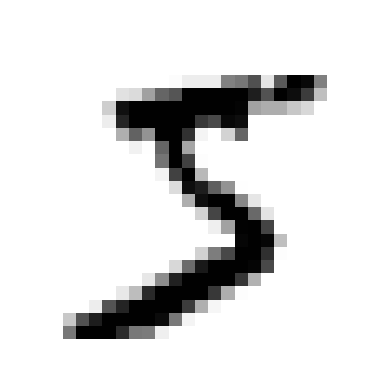

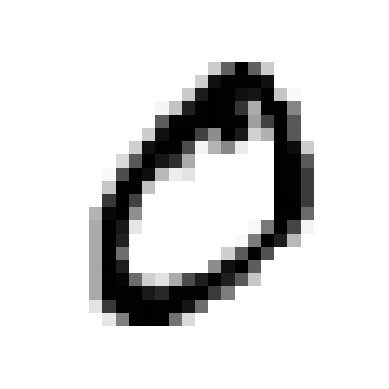

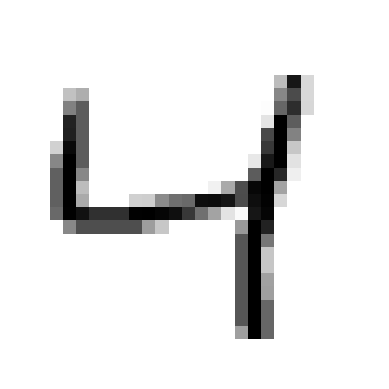

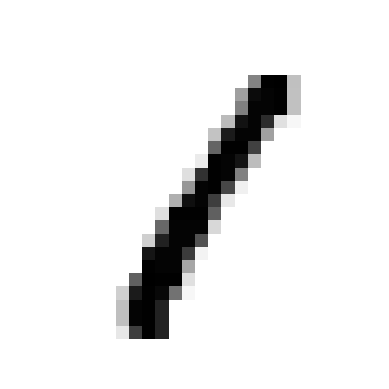

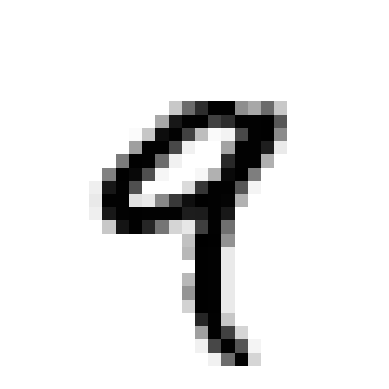

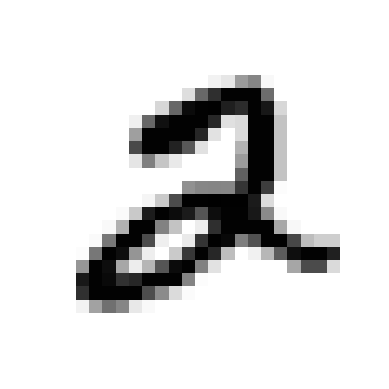

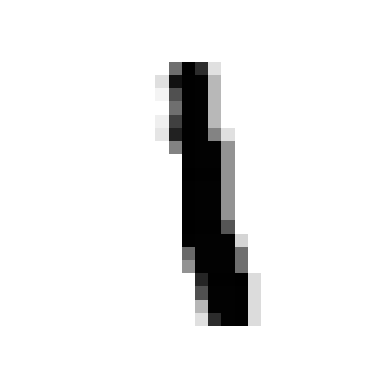

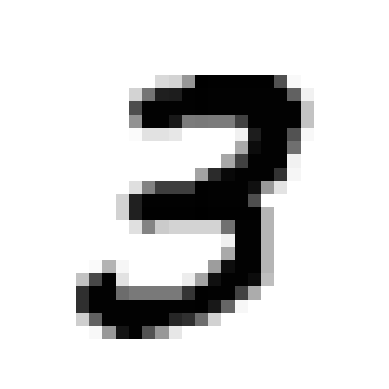

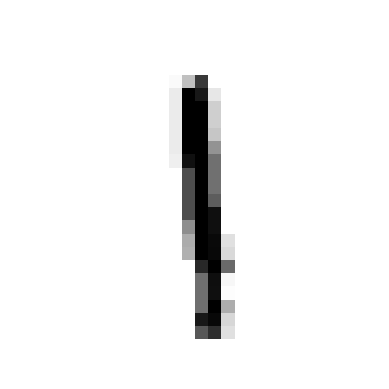

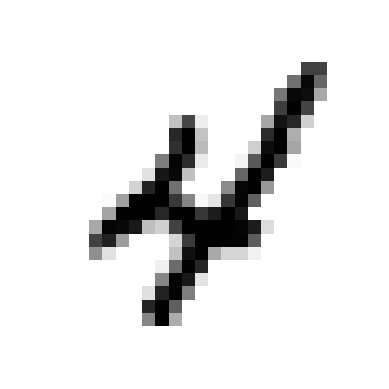

In [7]:
# Display the top 10 images of handwritten digits
for i in range(10):
    some_digit = X.iloc[i]
    some_digit_image = some_digit.values.reshape(28, 28)
    plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation='nearest')
    plt.axis('off')
    plt.show()

In [8]:
## let's set aside the test set
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [9]:
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train.iloc[shuffle_index], y_train.iloc[shuffle_index]


## 2. Training a Binary Classifier

> Let's simplify the problem for now and only try to identify one digit. eg: the number 5, this "5-detector" will be an example of a binary classifier, capable of distinguishing between just two classes, 5 and not-5.

In [10]:
y_train_5 = (y_train=="5") # true only for 5 
y_test_5 = (y_test=="5")
y_test_5.value_counts()

class
False    9108
True      892
Name: count, dtype: int64

In [11]:
## SGDClassifier
# - It is a linear classifier that uses stochastic gradient descent (SGD) for training.
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [12]:
sgd_clf.predict([X.iloc[0]])


E:\ML\01Projects\personal\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

### Performance Measures

In [13]:
## Measuring accuracy using Cross-validation
# - Occasionally we wil need more control over the cross-validation process than what scikit-learn provides off-the-shelf
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone 



In [15]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.8856 , 0.8795 , 0.88295])

In [ ]:
y_pred = sgd_clf.predict(X_test)

In [23]:
pd.DataFrame(y_pred).value_counts()

0    
False    9265
True      735
Name: count, dtype: int64

In [24]:
from sklearn.model_selection import cross_val_predict
y_pred_cv = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
pd.DataFrame(y_pred_cv).value_counts()

0    
False    55510
True      4490
Name: count, dtype: int64

In [25]:
## Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_pred_cv)


array([[53772,   807],
       [ 1738,  3683]])

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve
precision_score(y_train_5, y_pred_cv), recall_score(y_train_5, y_pred_cv), f1_score(y_train_5, y_pred_cv)
# outcomes
# 82% of time it predicted right for the given image is 5
# 67% of time it 
# 74% 

(0.8202672605790646, 0.679394945581996, 0.7432146100292604)

In [27]:
precision_recall_curve(y_train_5, y_pred_cv)

(array([0.09035   , 0.82026726, 1.        ]),
 array([1.        , 0.67939495, 0.        ]),
 array([False,  True]))